In [2]:
%matplotlib inline
import pandas as pd

In [3]:
titles = pd.DataFrame.from_csv('D:/Analytics Lab/Class Work/Day 7/data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orlando Vargas,2005
1,Niu-Peng,1989
2,Anandabhadram,2005
3,Mahendra Varma,1993
4,Beomdiga shidae,1970


In [5]:
cast = pd.DataFrame.from_csv('D:/Analytics Lab/Class Work/Day 7/data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [7]:
titles['decade_start'] = (titles['year'] // 10) * 10 + 1

In [8]:
titles.head(n=5)

,title,year,decade_start
0,Orlando Vargas,2005,2001
1,Niu-Peng,1989,1981
2,Anandabhadram,2005,2001
3,Mahendra Varma,1993,1991
4,Beomdiga shidae,1970,1971


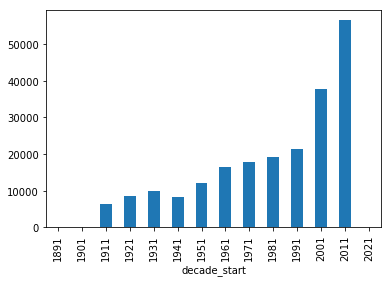

In [9]:

titles.groupby('decade_start')['title'].count().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

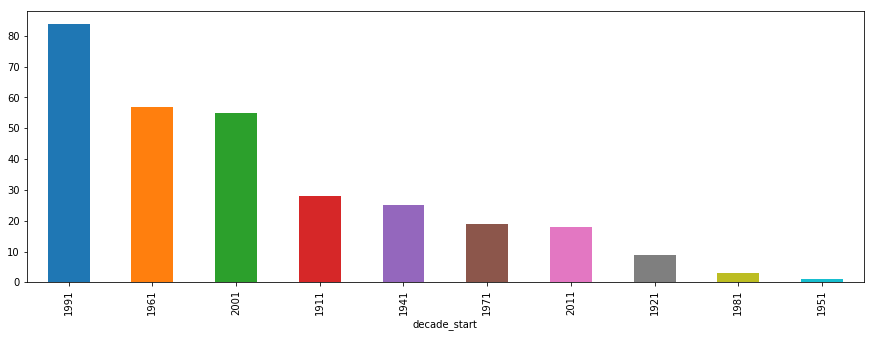

In [10]:
cast['decade_start'] = (cast['year'] // 10) * 10 + 1
cast[cast.title.str.lower()=='hamlet'].groupby('decade_start').count()['title'].sort_values(ascending=False).plot(kind="bar", figsize=(15,5))

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [10]:
cast_1950=cast.year//10*10==1950
cast[(cast_1950) & (cast.n == 1)].groupby('year').count()['title'].sort_values(ascending=False)

year
1957    990
1958    967
1959    965
1954    921
1953    921
1951    904
1956    899
1952    877
1950    874
1955    870
Name: title, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [11]:
%%time
cast[(cast_1950) & (cast.n >= 1) & (cast.n <=5)].groupby('type').count()['character']

Wall time: 99 ms


type
actor      26984
actress    15412
Name: character, dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [12]:
cast[cast.title.str.contains('Pink Panther')].groupby('type')['title'].count()

type
actor      391
actress    119
Name: title, dtype: int64

In [13]:
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [7]:
cast[cast.name.str.contains('Frank Oz')].groupby('year')['character'].count().sort_values(ascending=False)

year
1999    8
1992    8
1981    8
1979    8
1984    7
1996    4
1985    4
1983    3
2005    2
1982    2
1980    2
2015    1
2002    1
2001    1
1998    1
1986    1
Name: character, dtype: int64

# all_roles = cast[cast.name == 'Frank Oz'].groupby(['title', 'year']).count()['name'].reset_index()
all_roles
all_roles[all_roles.name > 1].sort_values(by='name',ascending=False)

In [45]:
cast[cast.name == 'Frank Oz']

,title,year,name,type,character,n,decade_start
1529414,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0,1981
1529415,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0,1981
1529416,Blues Brothers 2000,1998,Frank Oz,actor,Warden,4.0,1991
1529417,Innocent Blood,1992,Frank Oz,actor,Pathologist,21.0,1991
1529418,Inside Out,2015,Frank Oz,actor,Subconscious Guard Dave,14.0,2011
1529419,Labyrinth,1986,Frank Oz,actor,The Wiseman,17.0,1981
1529420,"Monsters, Inc.",2001,Frank Oz,actor,Fungus,9.0,2001
1529421,Muppet Treasure Island,1996,Frank Oz,actor,Miss Piggy,14.0,1991
1529422,Muppet Treasure Island,1996,Frank Oz,actor,Fozzie Bear,14.0,1991
1529423,Muppet Treasure Island,1996,Frank Oz,actor,Sam the Eagle,14.0,1991


### List each of the characters that Frank Oz has portrayed at least twice.

In [11]:
cast_twice=cast[cast.name=='Frank Oz'].groupby('character').count()['title'].reset_index()
cast_twice[cast_twice.title>=2]

,character,title
0,Animal,6
2,Bert,3
5,Cookie Monster,3
10,Fozzie Bear,4
15,Grover,2
18,Miss Piggy,6
25,Sam the Eagle,5
34,Yoda,5
